### Customer Churn dataset
Customer churn refers to phenomenon where customers discontinue their relationship with the company


_In this notebook we will implement backpropagation of MLP to get an idea about __Backpropagation__ and then in next notebooks understand that deeply_

Get the data:

In [207]:
import kagglehub
import os
import shutil

# Download Customer churn dataset latest version
# This will store dataset in " C:\Users\Arun\.cache\kagglehub\datasets\muhammadshahidazeem\customer-churn-dataset\versions\1"
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

my_path = r"C:\Users\Arun\Documents\Documents\Deep Learning\1_Introduction_To_ANNs\datasets\customer_churn"
os.makedirs(my_path, exist_ok=True)

for file_name in os.listdir(path):
    src = os.path.join(path,file_name)
    dst = os.path.join(my_path,file_name)
    shutil.copy(src=src, dst=dst)

Path to dataset files: C:\Users\Arun\.cache\kagglehub\datasets\muhammadshahidazeem\customer-churn-dataset\versions\1


In [208]:
import pandas as pd
data = pd.read_csv(r"datasets\customer_churn\customer_churn_dataset-training-master.csv")
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


_Getting info:_

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


_Using describe method:_

In [210]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


_Check lables:_

In [211]:
print("Lables to classify:", data['Churn'].unique())

Lables to classify: [ 1.  0. nan]


_Drop null value:_

In [212]:
data[data.isna().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
data.drop(199295,axis=0,inplace=True)

_drop 'CustomerID' too, its of no use_

In [214]:
data.drop('CustomerID',axis=1,inplace=True)

_This is a big data we will use a portion of it:_

In [215]:
# separate X,y
X = data.iloc[:,:-1]
y = data['Churn']

In [220]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_remove, y_train, y_remove = train_test_split(X,y,train_size=0.1,shuffle=True,stratify=y)

_Correlation:_

In [221]:
## Feature importances/ Correlation
numerical_features = ['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction','Churn']
corr_mat = data[numerical_features].corr()['Churn']
corr_mat.sort_values(ascending=False)

Churn               1.000000
Support Calls       0.574267
Payment Delay       0.312129
Age                 0.218394
Last Interaction    0.149616
Usage Frequency    -0.046101
Tenure             -0.051919
Total Spend        -0.429355
Name: Churn, dtype: float64

_Data Preparation_:
- Scaling and Encoding

In [222]:
print(X_train.columns)

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')


In [223]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_cols = ['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']
categorical_cols = ['Gender','Subscription Type','Contract Length']

prep_pipe = ColumnTransformer([
    ('scaler',StandardScaler(),numerical_cols),
    ('ohe',OneHotEncoder(),categorical_cols)
])

X_train_prepared = prep_pipe.fit_transform(X_train)

In [224]:
##See the result
column_names = (
    list(prep_pipe.named_transformers_['scaler'].get_feature_names_out(numerical_cols))
    + list(prep_pipe.named_transformers_['ohe'].get_feature_names_out(categorical_cols))
)

df_transformed = pd.DataFrame(X_train_prepared, columns=column_names)
df_transformed

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-0.748501,1.307646,0.142838,-0.526878,0.610234,-0.328072,0.990405,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.782763,0.325686,-0.905217,-1.176103,-0.479471,0.978654,-1.221785,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.540985,0.325686,-1.138118,-0.202265,0.125921,-0.395235,0.524681,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.669285,-0.482986,0.375739,0.446960,1.699938,-0.884734,0.990405,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.393244,-0.945085,-0.322964,0.771572,0.731312,-1.473443,-1.571079,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44078,-0.587315,1.307646,-0.788766,0.446960,1.336703,-1.170797,0.641112,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
44079,-1.473836,-1.695995,0.492189,0.771572,0.246999,-0.333338,-0.290337,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
44080,0.299206,-0.771798,0.957991,-1.176103,-0.963784,-2.132631,1.572560,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
44081,-0.264944,-1.002847,0.492189,1.420797,1.336703,-0.300171,-1.571079,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Build the architecture

In [225]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [226]:
#There are two types of models: Sequential-layers stacked on after another, Non-Sequential
model = Sequential()  


#first layer is input layer with 15 neurons(for 15 inputs)
#activation function used is sigmoid
model.add(Input(shape=(X_train_prepared.shape[1],)))

#We adding dense layer: each in a layer is connected to each neuron in previous layer
#Hidden layer with 10 neurons
model.add(Dense(10,activation='sigmoid'))

#Hidden layer with 5 neurons
model.add(Dense(10,activation='sigmoid'))

#Hidden layer with 5 neurons
model.add(Dense(10,activation='sigmoid'))

#Output layer
model.add(Dense(1,activation='sigmoid'))

In [227]:
##Summary about model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

In [228]:
##Compile the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])  
# binary_crossentropy means log-loss function (which is for binary classification problems as we are facing)
# optimizer = 'Adam', there are more optimiers, but Adam is good for SGD

In [229]:
#Train the model
# We are storing the fit model in 'history' that will help in analysis later
history = model.fit(X_train_prepared,y_train,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7937 - loss: 0.4254 - val_accuracy: 0.8938 - val_loss: 0.2564
Epoch 2/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9003 - loss: 0.2431 - val_accuracy: 0.9058 - val_loss: 0.2279
Epoch 3/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9131 - loss: 0.2133 - val_accuracy: 0.9236 - val_loss: 0.1910
Epoch 4/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9340 - loss: 0.1720 - val_accuracy: 0.9434 - val_loss: 0.1485
Epoch 5/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9514 - loss: 0.1348 - val_accuracy: 0.9551 - val_loss: 0.1220
Epoch 6/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9596 - loss: 0.1149 - val_accuracy: 0.9608 - val_loss: 0.1055
Epoch 7/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9649 - loss: 0.1030 - val_accuracy: 0.9661 - val_loss: 0.0949
Epoch 8/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9676 - loss: 0.0946 - 

In [ ]:
## The information about trained model is stored in "layers"
print(model.layers)

# getting weights of layer 2 (hidden layer 1)
print(model.layers[1].get_weights())

[<Dense name=dense_11, built=True>, <Dense name=dense_12, built=True>, <Dense name=dense_13, built=True>, <Dense name=dense_14, built=True>]
[array([[ 0.09142673,  0.935334  ,  0.2187672 , -0.11124503,  0.03852337,
         0.69873464, -0.8133942 ,  0.9859067 ,  0.09491749,  0.7133425 ],
       [-0.90256596,  0.29550362,  0.5935548 , -0.4566147 ,  1.0973489 ,
         0.44980314, -0.9489303 ,  0.1230201 , -1.1120498 ,  0.94606316],
       [ 1.927248  , -2.5151117 , -1.9333987 ,  1.1659706 , -1.8047533 ,
        -1.9079517 ,  2.3116422 , -1.6005191 ,  2.1130712 , -2.184335  ],
       [ 2.0750759 , -1.7983911 , -1.2033792 ,  1.881561  , -2.1315365 ,
        -1.5863469 ,  1.4620112 , -1.2761034 ,  1.7275872 , -1.4170982 ],
       [-0.8099009 ,  1.0070862 ,  0.4494078 , -0.88576156,  0.7634305 ,
         1.1126934 , -0.8642439 ,  0.9525522 , -1.597825  ,  1.1267617 ],
       [-0.9563218 ,  0.47870693,  1.4422956 , -1.0260409 ,  1.2681159 ,
         0.25786954, -0.6294726 ,  0.84126586, -0.

_Prepare Test data:_

In [ ]:
# history.history is a dict that stores data as shown below
print("Keys:",history.history.keys())

_Plot graphs:_

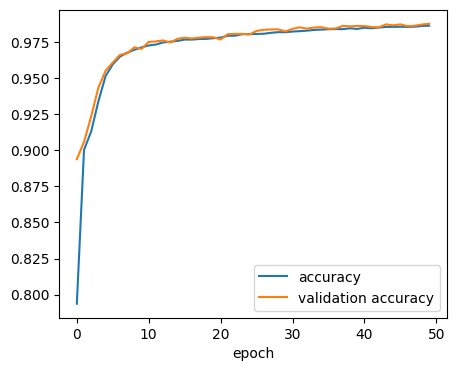

In [247]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel("epoch")
plt.legend()

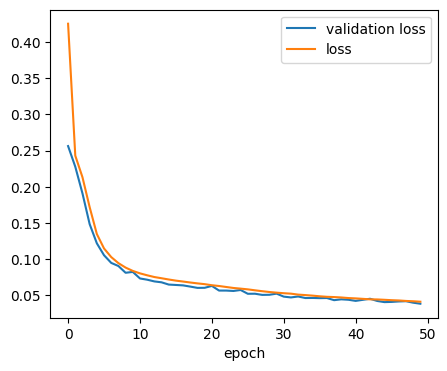

In [248]:
plt.figure(figsize=(5,4))
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['loss'], label='loss')
plt.xlabel("epoch")
plt.legend()

_Make predictions:_

In [251]:
# Preparing test data for evaluations
test_data = pd.read_csv(r"C:\Users\Arun\Documents\Documents\Deep Learning\1_Introduction_To_ANNs\datasets\customer_churn\customer_churn_dataset-testing-master.csv")

X_test = test_data.iloc[:,1:-1]
y_test = test_data['Churn']

#I dont want to test on all test instances
x_test, x_remove, y_test, y_remove = train_test_split(X_test, y_test, train_size=0.1,stratify=y_test)

X_test_prepped = prep_pipe.transform(x_test)

In [252]:
y_pred_prob = model.predict(X_test_prepped)
y_pred_prob

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.9874932 ],
       [0.99999994],
       [0.99999994],
       ...,
       [0.9999989 ],
       [0.99999994],
       [0.99999994]], shape=(6437, 1), dtype=float32)


Since we used 'sigmoid' activation function the output is 'probability'.   
Make a function to get binary output for binary classification


In [253]:
y_pred = np.where(y_pred_prob>0.5, 1,0)
np.unique(y_pred,return_counts=True)

(array([0, 1]), array([ 289, 6148]))

_Check accuracy:_

In [254]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5142146962870903

# I GIVE UP, THE ACCURACY IS NOT INCREASING
# I AM DOING SOMETHING WRONG HERE, I WILL CHECK IT OUT LATER 
# DAMNNNNNNNNNNNNN BHAI MERTE NO HERA